<a href="https://colab.research.google.com/github/hpsbhatia/Pyspark/blob/master/PySpark_with_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyspark with examples

We will be using Jupyter notebook for execution of various various scripts and commands. Let's start with Jupyter notebook basics.

##Introduction to Jupyter notebook basics

### Code cells

### Text cells

## Access to the shell

In [0]:
!ls

sample_data  spark-2.3.1-bin-hadoop2.7	spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!pwd

## Install Spark

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.3.1/spark-2.3.1-bin-hadoop2.7.tgz
!tar xf spark-2.3.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [91.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main am

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.3.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 
spark

In [0]:
!ls

sample_data		   spark-2.3.1-bin-hadoop2.7.tgz
spark-2.3.1-bin-hadoop2.7  spark-2.3.1-bin-hadoop2.7.tgz.1


## Downloading and preprocessing Chicago's Reported Crime Data

In [3]:
!wget -O reported-crimes.csv https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-05-05 02:26:10--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘reported-crimes.csv’

reported-crimes.csv     [             <=>    ] 945.64M  3.36MB/s               ^C
total 1189636
-rw-r--r--  1 root root 992288014 May  5 02:30 reported-crimes.csv
drwxr-xr-x  1 root root      4096 Apr  3 16:24 sample_data
drwxrwxr-x 13 1000 1000      4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root 225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz


In [0]:
!ls

reported-crimes.csv	   spark-2.3.1-bin-hadoop2.7.tgz
sample_data		   spark-2.3.1-bin-hadoop2.7.tgz.1
spark-2.3.1-bin-hadoop2.7


###Lets rename the file.

In [0]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv

mv: cannot stat 'rows.csv?accessType=DOWNLOAD': No such file or directory


In [0]:
!ls

In [4]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153| DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11| 

# Schemas

In [0]:
rc.printSchema()

##Creating Schema

In [0]:
from pyspark.sql.types import StructField,StructType, TimestampType, StringType, BooleanType, IntegerType, DoubleType

In [0]:
rc.columns

In [0]:
lables = (('ID', StringType()),
('Case Number', StringType()),
('Date', TimestampType()),
('Block', StringType()),
('IUCR', StringType()),
('Primary Type', StringType()),
('Description', StringType()),
('Location Description', StringType()),
('Arrest', StringType()),
('Domestic', BooleanType()),
('Beat', StringType()),
('District', StringType()),
('Ward', StringType()),
('Community Area', StringType()),
('FBI Code', StringType()),
('X Coordinate', StringType()),
('Y Coordinate', StringType()),
('Year', IntegerType()),
('Updated On', StringType()),
('Latitude', DoubleType()),
('Longitude', DoubleType()),
('Location', StringType()))

In [0]:
schema = StructType([StructField (x[0], x[1], True) for x in lables])
schema

In [0]:
rc= spark.read.csv('reported-crimes.csv',schema=schema)

In [0]:
rc.printSchema()


In [0]:
rc.show(5)

In [0]:
newSchema = StructType([i for i in rc.schema])
newSchema

#Working with columns

**Display only the first 5 rows of the column name IUCR**

In [0]:
rc.select('IUCR').show(5)

In [0]:
rc.select(rc.IUCR).show(5)

  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [0]:
rc.select('Case Number', 'Date', 'Arrest').distinct().show(4)

**Add a column with name One, with entries all 1s**

In [0]:
from pyspark.sql.functions import lit

In [0]:
rc = rc.withColumn('One', lit(1)).show(5)

**Remove the column IUCR**

In [0]:
rc.drop('IUCR')

## Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [0]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

In [0]:
rc.union(one_day).orderBy('Date',ascending=False).show(5)

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [0]:
rc.groupBy('Primary type').count().show()

In [0]:
rc.groupBy('Primary type').count().orderBy('count', ascending = False).show(10)

#Challenge questions

**What percentage of reported crimes resulted in an arrest?**

In [0]:
rc.columns

In [0]:
cd=rc.filter(col('Arrest')=="true").count()
ds = rc.count()
perc = (cd/ds)*100
perc

  **What are the top 3 locations for reported crimes?**

In [0]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

# Built-in functions

In [0]:
from pyspark.sql import functions

In [0]:
print(dir(functions))

['AutoBatchedSerializer', 'Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PickleSerializer', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_binary_mathfunctions', '_collect_list_doc', '_collect_set_doc', '_create_binary_mathfunction', '_create_function', '_create_udf', '_create_window_function', '_functions', '_functions_1_4', '_functions_1_6', '_functions_2_1', '_functions_deprecated', '_lit_doc', '_message', '_string_functions', '_test', '_to_java_column', '_to_seq', '_window_functions', '_wrap_deprecated_function', 'abs', 'acos', 'add_months', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'asc', 'ascii', 'asin', 'atan', 'atan2', 'avg', 'base64', 'bin', 'bitwiseNOT', 'blacklist', 'broadcast', 'bround', 'cbrt', 'ceil', 'coalesce', 'col', 'collect_list', 'collect_set', 'column', 'concat', 'concat_ws', 'conv', 'c

## String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [0]:
from pyspark.sql.functions import lower, upper, substring

In [0]:
help(substring)

In [0]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1,4)).show(5)

## Numeric functions


**Show the oldest date and the most recent date**

In [0]:
from pyspark.sql.functions import min, max

In [0]:
rc.select(min(col('Date')), max(col('Date'))).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-10 23:55:00|
+-------------------+-------------------+



##Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [0]:
from pyspark.sql.functions import date_add, date_sub

In [0]:
help(date_add)  

In [0]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show()

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-13|
+----------------------+----------------------+



## Working with dates

In [0]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [20]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [0]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show()


**25/Dec/2019 13:30:00**

In [0]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

In [0]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show()

**12/25/2019 01:30:00 PM**

In [0]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(truncate=False)

In [0]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss aa')).show(1)

## Joins

**Download police station data**

In [5]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

--2020-05-05 02:31:12--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2020-05-05 02:31:12 (575 MB/s) - ‘police-station.csv’ saved [5699]

total 1189648
-rw-r--r--  1 root root      5699 Aug 19  2019 police-station.csv
-rw-r--r--  1 root root 992288014 May  5 02:30 reported-crimes.csv
drwxr-xr-x  1 root root      4096 Apr  3 16:24 sample_data
drwxrwxr-x 13 1000 1000      4096 Jun  1  2018 spark-2.3.1-bin-hadoop2.7
-rw-r--r--  1 root root 225883783 Jun  1  2018 spark-2.3.1-bin-hadoop2.7.tgz
drwxr-xr-x  2 root root      4096 May  5 02:30 spark-warehouse


In [0]:
ps = spark.read.csv('police-station.csv',header=True)

In [10]:
ps.show(5,truncate=False)

+------------+--------------+--------------------+-------+-----+-----+-------------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME |ADDRESS             |CITY   |STATE|ZIP  |WEBSITE                                                                        |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+--------------+--------------------+-------+-----+-----+-------------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|1           |Central       |1718 S State St     |Chicago|IL   |60616|http://home.chicagopolice.org/community/districts/1st-district-central/        |312-745-4290|312-745-3694|312-7

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [0]:
rc.cache()
rc.count()

In [0]:
ps.show(30)

In [0]:
from pyspark.sql.functions import lpad

In [0]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [0]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show(10)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 001|
|                 006|
|                 011|
|                 016|
|                 024|
|                 002|
|                 007|
|                 025|
|                 010|
+--------------------+
only showing top 10 rows



In [0]:
ps = ps.withColumn('Format_District',lpad(col('DISTRICT'), 3, '0'))

In [0]:
rc.join(ps, rc.District==ps.Format_District, 'left_outer').show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_District|
+--------+-----------+----------

In [0]:
ps.columns

In [0]:
rc.join(ps, rc.District==ps.Format_District, 'left_outer').drop('ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show(10)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|Format_District|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+---------------+
|11034701|   JA366925|2001-01-01 11:00:00|     016XX E 86TH PL|1153|  DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           RESIDENCE| false|   false|0412|     004|   8|            45|      11|2001|08/05/2017 03:50:...|       4| Sou

## Challenge questions

**What is the most frequently reported non-criminal activity?**

In [0]:
rc.columns

In [0]:
rc.select('Primary Type').distinct().orderBy(col('Primary Type')).show(35, truncate=False)

In [0]:
from pyspark.sql.functions import max

In [0]:
rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)') ).groupBy(col('Description')).count().orderBy('count', ascending = False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|FOID - REVOCATION                          |31   |
|LOST PASSPORT                              |23   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |1    |
|CONCEALED CARRY LICENSE REVOCATION         |1    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|1    |
+-------------------------------------------+-----+



SyntaxError: ignored

**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [11]:
rc.cache()
rc.count()

3863942

In [0]:
from pyspark.sql.functions import dayofweek, date_format

In [0]:
help(date_format)

In [13]:
rc.select(col('Date'),dayofweek(col('Date')), date_format(col('Date'), 'E')).show(10)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2001-01-01 11:00:00|              2|                 Mon|
|2017-10-08 03:00:00|              1|                 Sun|
|2017-03-28 14:00:00|              3|                 Tue|
|2017-09-09 20:17:00|              7|                 Sat|
|2017-08-26 10:00:00|              7|                 Sat|
|2013-02-10 00:00:00|              1|                 Sun|
|2015-01-01 00:01:00|              5|                 Thu|
|2017-01-01 00:01:00|              1|                 Sun|
|2017-07-17 10:10:00|              2|                 Mon|
|2017-12-28 15:55:00|              5|                 Thu|
+-------------------+---------------+--------------------+
only showing top 10 rows



In [25]:
nc = rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count',ascending=False).collect()
nc

[Row(date_format(Date, E)='Fri', count=578656),
 Row(date_format(Date, E)='Wed', count=556199),
 Row(date_format(Date, E)='Tue', count=553530),
 Row(date_format(Date, E)='Sat', count=553323),
 Row(date_format(Date, E)='Thu', count=552956),
 Row(date_format(Date, E)='Mon', count=546786),
 Row(date_format(Date, E)='Sun', count=522492)]

In [15]:
Dow = [x[0] for x in nc] 
Dow

['Fri', 'Wed', 'Tue', 'Sat', 'Thu', 'Mon', 'Sun']

In [16]:
cnt =  [x[1] for x in nc] 
cnt

[578656, 556199, 553530, 553323, 552956, 546786, 522492]

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
cp = pd.DataFrame({'Day_of_week': Dow, 'Count': cnt})

In [19]:
cp.head()

,Day_of_week,Count
0,Fri,578656
1,Wed,556199
2,Tue,553530
3,Sat,553323
4,Thu,552956


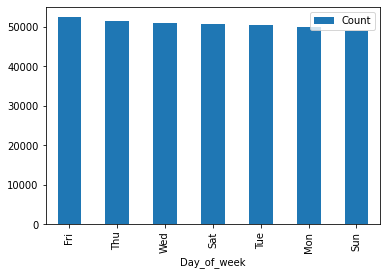

In [0]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day_of_week',y='Count')

## Downloading Chicago's police station dataset

In [0]:
!wget -O police-stations.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
!ls -l

## RDDs setup

In [35]:
psrdd = sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [37]:
ps_header = psrdd.first()
ps_header

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [0]:
ps_rest = psrdd.filter(lambda line: line != ps_header)

In [41]:
ps_rest.first()

'1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/districts/1st-district-central/,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.85837259,-87.62735617,"(41.8583725929, -87.627356171)"'

**How many police stations are there?**

In [48]:
tot_ps =  ps_rest.map(lambda line: line.split(",")).count()
tot_ps

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [52]:
(ps_rest.filter(lambda line : line.split(",")[0]=='7')).map(lambda line: 
     (line.split(",")[0],
     line.split(",")[1],
     line.split(",")[2],
     line.split(",")[5])).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [53]:
(ps_rest.filter(lambda line : line.split(",")[0] in ['10','11'])).map(lambda line: 
     (line.split(",")[0],
     line.split(",")[1],
     line.split(",")[2],
     line.split(",")[5])).collect()

[('11', 'Harrison', '3151 W Harrison St', '60612'),
 ('10', 'Ogden', '3315 W Ogden Ave', '60623')]